In [94]:
import numpy as np
from scipy.linalg import norm, eig
import time
from geoarray import GeoArray
import scipy
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import tkinter
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

In [46]:
def remove_bad_bands(spectra: np.array):
    bands = list(range(1,426))
    bands = np.array(bands)
    deeph2o = np.logical_or(np.logical_and(bands > 181, bands < 224), np.logical_and(bands > 275, bands < 329))
    bad_cal = bands > 418
    bad = np.logical_or(deeph2o, bad_cal)
    spectra[bad] = np.nan

In [47]:
Kurnool_India = GeoArray(r'C:\\Users\\vpatro\\Desktop\\ang20160126\\ang20160126t055327_corr_v2m2_img')
print('Shape of Kurnool, India: ', Kurnool_India.shape)
Pavicharam_India = GeoArray(r'C:\\Users\\vpatro\\Desktop\\ang20180318t060114\ang20180318t060114_corr_v2s1_img')
print('Shape of Pavicharam, India: ', Pavicharam_India.shape)
SF_bay = GeoArray(r'C:\\Users\\vpatro\\Desktop\\ang20181009t191224\\ang20181009t191224_corr_v2t1_img')
print('Shape of SF Bay: ', SF_bay.shape)

Shape of Kurnool, India:  (5618, 704, 425)
Shape of Pavicharam, India:  (5130, 680, 425)
Shape of SF Bay:  (3998, 670, 425)


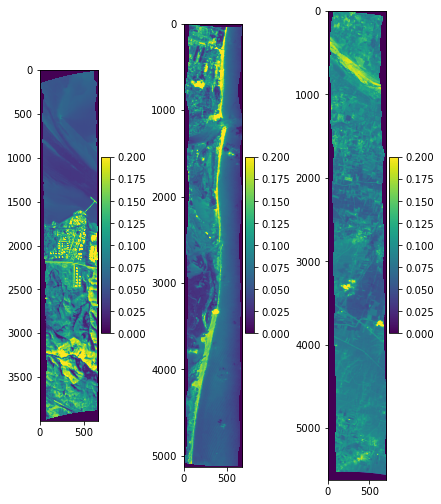

In [48]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (6,12), constrained_layout = True)
im = axs[0].imshow(SF_bay[:,:,50])
plt.colorbar(im, ax = axs[0])
im.set_clim(0,0.2)
im2 = axs[1].imshow(Pavicharam_India[:,:,50])
plt.colorbar(im2, ax = axs[1])
im2.set_clim(0,0.2)
im3 = axs[2].imshow(Kurnool_India[:,:,50])
plt.colorbar(im3, ax = axs[2])
im3.set_clim(0,0.2)

In [49]:
 # removing peripheral pushbroom effects
start_time = time.time()
Kurnool_India = Kurnool_India[1000:4000, 150:600, :]
print("--- %s seconds ---" % (time.time() - start_time))
print(Kurnool_India.shape)

--- 71.60485315322876 seconds ---
(3000, 450, 425)


In [50]:
start_time = time.time()
Pavicharam_India = Pavicharam_India[75:2500, 200:600, :]
print("--- %s seconds ---" % (time.time() - start_time))
print(Pavicharam_India.shape)

--- 13.603461980819702 seconds ---
(2425, 400, 425)


In [51]:
start_time = time.time()
SF_bay = SF_bay[1200:2700, 150:500, :]
print("--- %s seconds ---" % (time.time() - start_time))
print(SF_bay.shape)

--- 38.32292723655701 seconds ---
(1500, 350, 425)


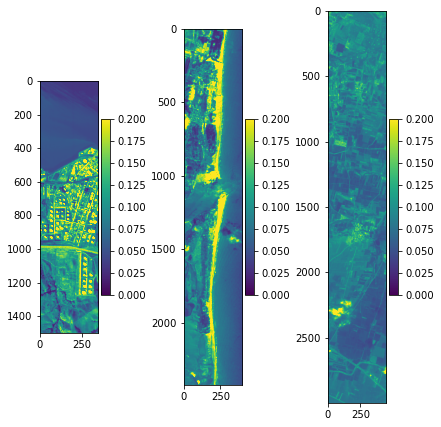

In [52]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (6,12), constrained_layout = True)
im = axs[0].imshow(SF_bay[:,:,50])
plt.colorbar(im, ax = axs[0])
im.set_clim(0,0.2)
im2 = axs[1].imshow(Pavicharam_India[:,:,50])
plt.colorbar(im2, ax = axs[1])
im2.set_clim(0,0.2)
im3 = axs[2].imshow(Kurnool_India[:,:,50])
plt.colorbar(im3, ax = axs[2])
im3.set_clim(0,0.2)

In [53]:
Kurnool_India = Kurnool_India.reshape(Kurnool_India.shape[0]*Kurnool_India.shape[1], Kurnool_India.shape[2])
print('reshapen Kurnool_India: ', Kurnool_India.shape)
Pavicharam_India = Pavicharam_India.reshape(Pavicharam_India.shape[0]*Pavicharam_India.shape[1], Pavicharam_India.shape[2])
print('reshapen Pavicharam_India: ', Pavicharam_India.shape)
SF_bay = SF_bay.reshape(SF_bay.shape[0]*SF_bay.shape[1], SF_bay.shape[2])
print('reshapen SF_bay: ', SF_bay.shape)

reshapen Kurnool_India:  (1350000, 425)
reshapen Pavicharam_India:  (970000, 425)
reshapen SF_bay:  (525000, 425)


In [57]:
combined = np.concatenate((Kurnool_India, Pavicharam_India, SF_bay), axis = 0)

In [58]:
combined.shape

(2845000, 425)

Text(0.5, 1.0, 'Covariance Matrix')

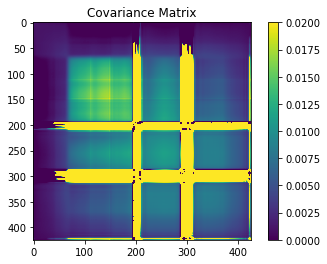

In [67]:
# visualizing covariance matrix - why is it that we only need every 40th?
copied = combined.copy()
subsample = np.arange(0,copied.shape[0],60) # gathering indices we want
X_sub = copied[subsample,:].copy()
Cov = np.cov(X_sub, rowvar = False)

plt.imshow(Cov)
plt.colorbar()
plt.clim(0,0.02)
plt.title('Covariance Matrix')

C:\Users\vpatro\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


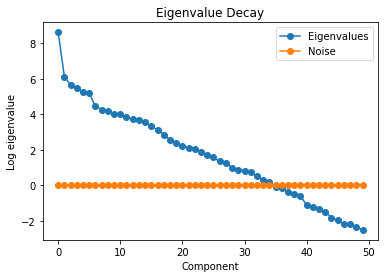

In [68]:
# eigenvector analysis
eigenvalues, eigenvectors = eig(Cov)
noise = np.zeros(50)
plt.plot(np.arange(50), np.log10(eigenvalues[:50]), label = 'Eigenvalues', marker = 'o')
plt.plot(noise, label = 'Noise', marker = 'o')
plt.title('Eigenvalue Decay')
plt.xlabel('Component')
plt.ylabel('Log eigenvalue')
plt.legend()

In [69]:
combined.shape

(2845000, 425)

In [117]:
# clustering takes a little over 3 min
start_time = time.time()
seed = 8
kmeans_4 = KMeans(init='k-means++', n_clusters = 4, n_init=10, random_state=seed).fit(combined)
print("--- %s seconds ---" % (time.time() - start_time))

--- 247.69436740875244 seconds ---


In [118]:
Z_4 = kmeans_4.predict(combined)
clusterCount_4 = np.bincount(kmeans_4.labels_)
print(clusterCount_4)

[2844997       1       1       1]


[ 1.54714296e-02  2.26671584e-02  2.58990414e-02  2.83052120e-02
  2.97649205e-02  3.31017375e-02  3.44827324e-02  3.59691642e-02
  3.74961309e-02  3.88739370e-02  4.07604463e-02  4.40315120e-02
  4.41294126e-02  4.64696623e-02  4.89939861e-02  5.06281964e-02
  5.28004952e-02  5.55137172e-02  5.65204993e-02  5.82915433e-02
  5.99479564e-02  6.22617751e-02  6.39083087e-02  6.47671595e-02
  6.61519095e-02  6.74090385e-02  6.78823814e-02  7.02467710e-02
  7.33183920e-02  7.50887468e-02  7.79017434e-02  8.03865343e-02
  8.22867379e-02  8.33026394e-02  8.47618878e-02  8.66117328e-02
  8.74331146e-02  8.77630785e-02  8.80706012e-02  8.78526792e-02
  8.76556039e-02  8.78140330e-02  8.90021026e-02  8.97654220e-02
  8.87733847e-02  8.77961367e-02  8.76132697e-02  8.77156705e-02
  8.77178162e-02  8.78033638e-02  8.83407518e-02  8.90836790e-02
  8.96306857e-02  9.02608112e-02  9.14849862e-02  9.20198262e-02
  9.21390131e-02  9.17278752e-02  9.20976996e-02  9.22093689e-02
  9.26103219e-02  9.39510

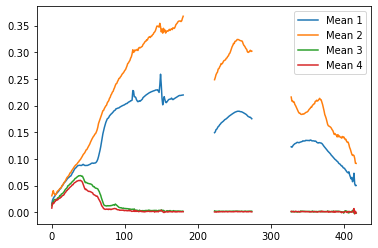

In [119]:
means_4 = kmeans_4.cluster_centers_
print(means_4[0])
means_4_no_nan = means_4.copy()
for i in range(means_4.shape[0]):
    remove_bad_bands(means_4[i])
    plt.plot(means_4[i], label = 'Mean ' + str(i+1))
plt.legend()

In [101]:
combined.shape

(2845000, 425)

In [75]:
# clustering takes a little over 6 min
start_time = time.time()
seed = 8
kmeans_6 = KMeans(init='k-means++', n_clusters = 6, n_init=10, random_state=seed).fit(combined)
print("--- %s seconds ---" % (time.time() - start_time))

--- 382.3384268283844 seconds ---


In [76]:
Z_6 = kmeans_6.predict(combined)
clusterCount_6 = np.bincount(kmeans_6.labels_)
print(clusterCount_6)

[2844994       1       1       1       2       1]


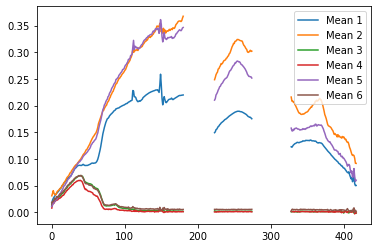

In [85]:
means_6 = kmeans_6.cluster_centers_
means_6_no_nan = means_6.copy()
for i in range(means_6.shape[0]):
    remove_bad_bands(means_6[i])
    plt.plot(means_6[i], label = 'Mean ' + str(i+1))
plt.legend()

In [89]:
""" 

from scipy.cluster.vq import vq
start_time = time.time()
nearest_cluster, distance_to = vq(means_6, combined)

ERROR: ValueError: array must not contain infs or NaNs


from sklearn.metrics import pairwise_distances_argmin_min
start_time = time.time()
nearest_cluster, distance_to = pairwise_distances_argmin_min(means_6, combined)
print("--- %s seconds ---" % (time.time() - start_time))

ERROR: ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

"""

' \n\nfrom scipy.cluster.vq import vq\nstart_time = time.time()\nnearest_cluster, distance_to = vq(means_6, combined)\n\nERROR: ValueError: array must not contain infs or NaNs\n\n\nfrom sklearn.metrics import pairwise_distances_argmin_min\nstart_time = time.time()\nnearest_cluster, distance_to = pairwise_distances_argmin_min(means_6, combined)\nprint("--- %s seconds ---" % (time.time() - start_time))\n\nERROR: ValueError: Input contains NaN, infinity or a value too large for dtype(\'float32\').\n\n'

In [95]:
arr = np.array([1, 2])

(0.0, 1.0)

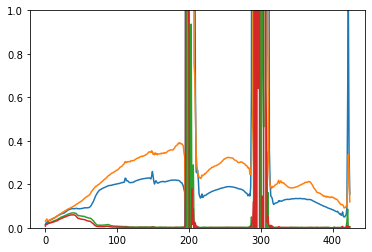

In [123]:
plt.plot(means_4_no_nan[0], label = 'Mean 1')
plt.plot(means_4_no_nan[1], label = 'Mean 2')
plt.plot(means_4_no_nan[2], label = 'Mean 3')
plt.plot(means_4_no_nan[3], label = 'Mean 4')
plt.ylim(0,1)

In [130]:
from scipy.spatial import distance
closest_ind = 0
min_dist = np.inf
for i in range(combined.shape[0]):
    x = distance.euclidean(means_4_no_nan[1], combined[i])
    if x < min_dist:
        closest_ind = i
        min_dist = x
        
print('closest spectra: ' + str(closest_ind))
print('distance: ' + str(min_dist))
        
        
    

closest spectra: 2676728
distance: 9.020127436087932e-07


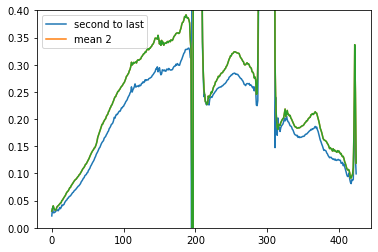

In [134]:
plt.plot(combined[2844999], label = 'second to last')
plt.plot(means_4_no_nan[1], label = 'mean 2')
plt.plot(combined[2676728])
plt.ylim(0,0.4)
plt.legend()

In [131]:
distance.euclidean(means_4_no_nan[1], combined[2844999])

57920344.0